In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import *
from math import sqrt

data = pd.read_csv("data_SCE.csv")
data

,pitcher_ask_amount,ask_equity,ask_valuation,total_sharks_invested,Total equity
0,50.0,5.0,1000.00,3,16.00
1,40.0,15.0,266.67,2,50.00
2,25.0,10.0,250.00,2,30.00
3,70.0,1.0,7000.00,1,2.75
4,50.0,5.0,1000.00,0,0.00
...,...,...,...,...,...
112,60.0,2.0,3000.00,0,0.00
113,100.0,1.0,10000.00,0,0.00
114,40.0,8.0,500.00,4,30.00
115,50.0,4.0,1250.00,0,0.00


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pitcher_ask_amount     117 non-null    float64
 1   ask_equity             117 non-null    float64
 2   ask_valuation          117 non-null    float64
 3   total_sharks_invested  117 non-null    int64  
 4   Total equity           117 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 4.7 KB


In [3]:
data.describe()

,pitcher_ask_amount,ask_equity,ask_valuation,total_sharks_invested,Total equity
count,117.000000,117.000000,117.000000,117.000000,117.000000
mean,319.854709,5.188034,3852.462479,1.230769,8.963504
std,2767.842777,3.892121,11931.601957,1.410457,13.106769
min,0.001010,0.250000,0.010000,0.000000,0.000000
25%,45.000000,2.500000,666.670000,0.000000,0.000000
50%,50.000000,5.000000,1250.000000,1.000000,3.000000
75%,80.000000,7.500000,2857.140000,2.000000,15.000000
max,30000.000000,25.000000,120000.000000,5.000000,75.000000


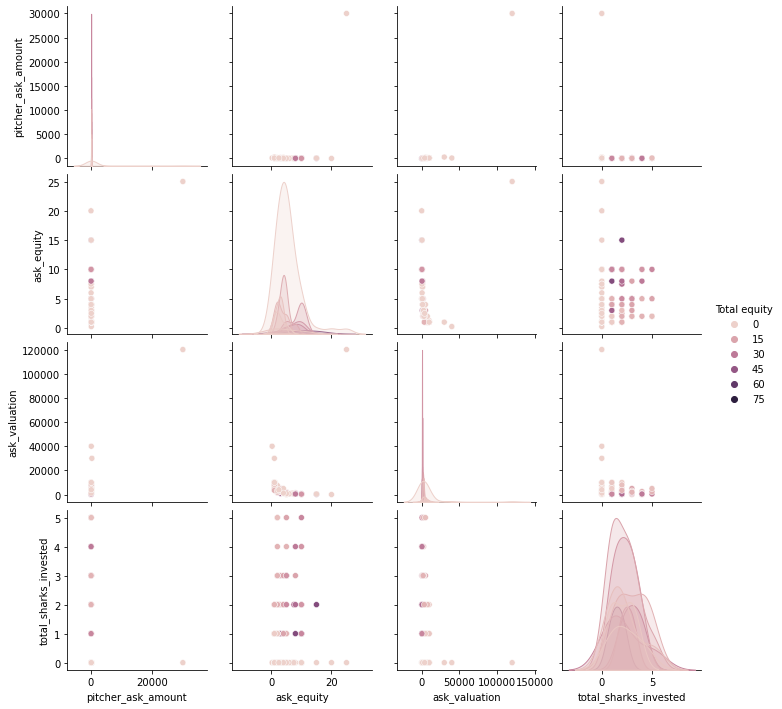

In [4]:
sns.pairplot(data,hue='Total equity',vars=['pitcher_ask_amount','ask_equity','ask_valuation','total_sharks_invested'])

<AxesSubplot:xlabel='Total equity'>

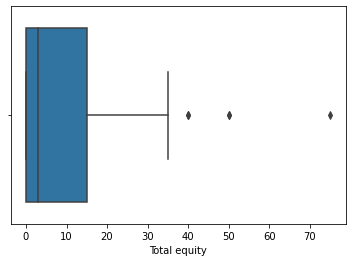

In [5]:
sns.boxplot(x='Total equity',data = data)

<AxesSubplot:>

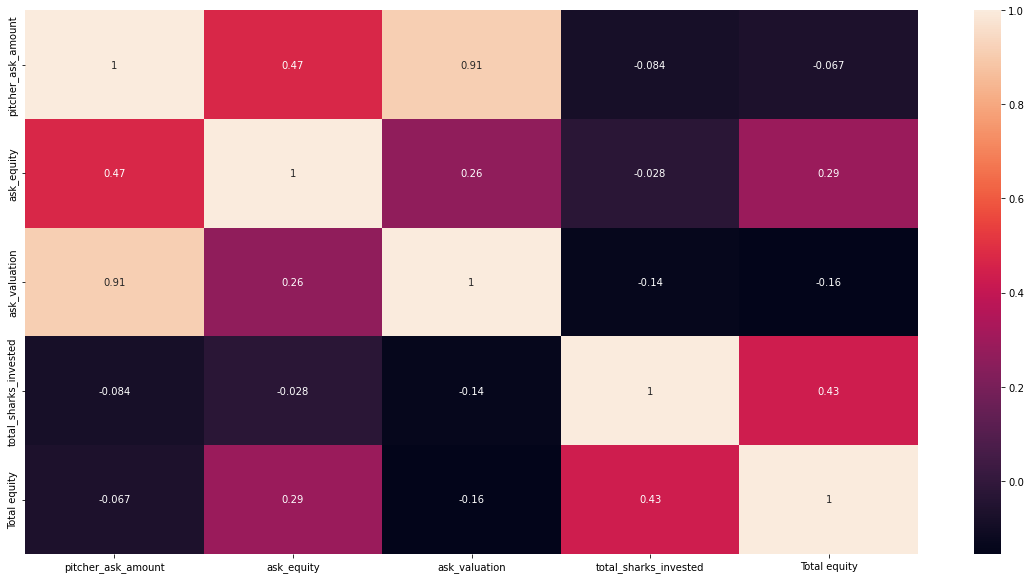

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot = True)

In [7]:
data.skew()

pitcher_ask_amount       10.813586
ask_equity                1.945516
ask_valuation             8.425035
total_sharks_invested     0.968345
Total equity              2.109755
dtype: float64

In [8]:
data.kurt()

pitcher_ask_amount       116.955277
ask_equity                 6.279757
ask_valuation             79.420551
total_sharks_invested      0.051861
Total equity               5.782666
dtype: float64

In [9]:
X = data.drop('Total equity',axis=1)
y = data['Total equity']
y = np.array(y)

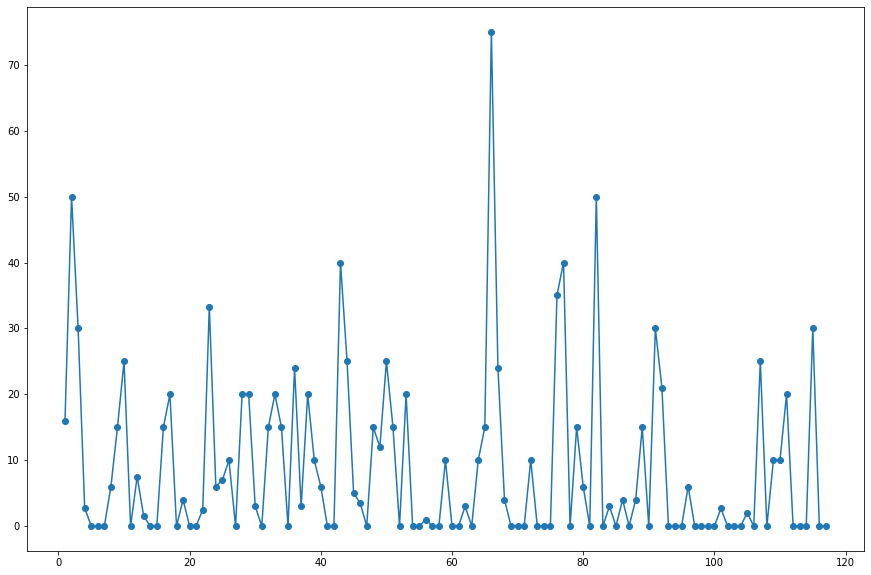

In [10]:
a = []
for i in range(1,118):
    a.append(i)
plt.figure(figsize=(15,10))
plt.scatter(a,y)
plt.plot(a,y)
plt.show()

In [11]:
X

,pitcher_ask_amount,ask_equity,ask_valuation,total_sharks_invested
0,50.0,5.0,1000.00,3
1,40.0,15.0,266.67,2
2,25.0,10.0,250.00,2
3,70.0,1.0,7000.00,1
4,50.0,5.0,1000.00,0
...,...,...,...,...
112,60.0,2.0,3000.00,0
113,100.0,1.0,10000.00,0
114,40.0,8.0,500.00,4
115,50.0,4.0,1250.00,0


In [12]:
y = pd.DataFrame(y)
y

,0
0,16.00
1,50.00
2,30.00
3,2.75
4,0.00
...,...
112,0.00
113,0.00
114,30.00
115,0.00


In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) # 80 * 20

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
model = Sequential()
model.add(Dense(4,kernel_initializer = 'random_uniform', input_dim=4, activation="softsign"))
model.add(Dense(9,kernel_initializer = 'random_uniform', activation="softsign"))
model.add(Dense(1,kernel_initializer = 'random_uniform', activation="linear"))

In [16]:
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["accuracy","mean_absolute_error"])

In [17]:
history = model.fit(X_train, y_train,steps_per_epoch=5, epochs=140,batch_size = 4,verbose=1, validation_split = 0.2)

Epoch 1/140
5/5 [==============================] - 4s 65ms/step - loss: 307.2163 - accuracy: 0.1500 - mean_absolute_error: 11.1417 - val_loss: 386.5637 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 10.3749
Epoch 2/140
5/5 [==============================] - 0s 22ms/step - loss: 85.9855 - accuracy: 0.0500 - mean_absolute_error: 6.2134 - val_loss: 377.1074 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 10.0500
Epoch 3/140
5/5 [==============================] - 0s 21ms/step - loss: 115.4037 - accuracy: 0.0000e+00 - mean_absolute_error: 6.9307 - val_loss: 367.4037 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 9.7552
Epoch 4/140
5/5 [==============================] - 0s 22ms/step - loss: 405.8693 - accuracy: 0.0000e+00 - mean_absolute_error: 13.4965 - val_loss: 346.6884 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 9.3198
Epoch 5/140
5/5 [==============================] - 0s 25ms/step - loss: 388.9119 - accuracy: 0.0000e+00 - mean_absolute_error: 13.0455 - val_

Epoch 40/140
5/5 [==============================] - 0s 26ms/step - loss: 92.5029 - accuracy: 0.7000 - mean_absolute_error: 5.0087 - val_loss: 271.8305 - val_accuracy: 0.1579 - val_mean_absolute_error: 11.3693
Epoch 41/140
5/5 [==============================] - 0s 23ms/step - loss: 62.1737 - accuracy: 0.3500 - mean_absolute_error: 5.8826 - val_loss: 254.9736 - val_accuracy: 0.1579 - val_mean_absolute_error: 9.8428
Epoch 42/140
5/5 [==============================] - 0s 22ms/step - loss: 49.8272 - accuracy: 0.3889 - mean_absolute_error: 4.5004 - val_loss: 253.2212 - val_accuracy: 0.1579 - val_mean_absolute_error: 9.7645
Epoch 43/140
5/5 [==============================] - 0s 25ms/step - loss: 139.9337 - accuracy: 0.5500 - mean_absolute_error: 6.7637 - val_loss: 251.7106 - val_accuracy: 0.1579 - val_mean_absolute_error: 9.8241
Epoch 44/140
5/5 [==============================] - 0s 24ms/step - loss: 39.7222 - accuracy: 0.4500 - mean_absolute_error: 3.5984 - val_loss: 250.4405 - val_accuracy:

5/5 [==============================] - 0s 21ms/step - loss: 94.9446 - accuracy: 0.6000 - mean_absolute_error: 4.6080 - val_loss: 277.3039 - val_accuracy: 0.1579 - val_mean_absolute_error: 11.4382
Epoch 80/140
5/5 [==============================] - 0s 22ms/step - loss: 59.4538 - accuracy: 0.1667 - mean_absolute_error: 5.7943 - val_loss: 252.7117 - val_accuracy: 0.1579 - val_mean_absolute_error: 9.9726
Epoch 81/140
5/5 [==============================] - 0s 23ms/step - loss: 80.9343 - accuracy: 0.2500 - mean_absolute_error: 5.1988 - val_loss: 250.8177 - val_accuracy: 0.1579 - val_mean_absolute_error: 9.9700
Epoch 82/140
5/5 [==============================] - 0s 22ms/step - loss: 29.3559 - accuracy: 0.4500 - mean_absolute_error: 3.0827 - val_loss: 249.8427 - val_accuracy: 0.1579 - val_mean_absolute_error: 9.8089
Epoch 83/140
5/5 [==============================] - 0s 21ms/step - loss: 160.6672 - accuracy: 0.4500 - mean_absolute_error: 8.3037 - val_loss: 251.9350 - val_accuracy: 0.1579 - val

5/5 [==============================] - 0s 21ms/step - loss: 11.6815 - accuracy: 0.4444 - mean_absolute_error: 2.0882 - val_loss: 237.8243 - val_accuracy: 0.1579 - val_mean_absolute_error: 9.9324
Epoch 119/140
5/5 [==============================] - 0s 22ms/step - loss: 85.4273 - accuracy: 0.3000 - mean_absolute_error: 5.8909 - val_loss: 239.9341 - val_accuracy: 0.1579 - val_mean_absolute_error: 10.1653
Epoch 120/140
5/5 [==============================] - 0s 22ms/step - loss: 77.6754 - accuracy: 0.3000 - mean_absolute_error: 5.6137 - val_loss: 230.2812 - val_accuracy: 0.1579 - val_mean_absolute_error: 9.6643
Epoch 121/140
5/5 [==============================] - 0s 21ms/step - loss: 64.6498 - accuracy: 0.3500 - mean_absolute_error: 4.7303 - val_loss: 230.8353 - val_accuracy: 0.1579 - val_mean_absolute_error: 9.7064
Epoch 122/140
5/5 [==============================] - 0s 21ms/step - loss: 69.6387 - accuracy: 0.3889 - mean_absolute_error: 4.7514 - val_loss: 228.5326 - val_accuracy: 0.1579 - 

In [18]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 96ms/step


In [19]:
for i in range(len(y_pred)):
    if y_pred[i]<0:
        y_pred[i] = 0
y_pred = np.array(y_pred)
y_test = np.array(y_test)

In [20]:
print("Original test values \t | Predicted values")
print("-----------------------------------------")
for j in range(len(y_test)):
    print(y_test[j],'\t\t\t | ',y_pred[j])

Original test values 	 | Predicted values
-----------------------------------------
[0.] 			 |  [3.642839]
[0.] 			 |  [0.]
[6.] 			 |  [12.502613]
[21.] 			 |  [15.723087]
[6.] 			 |  [10.815786]
[0.] 			 |  [0.]
[0.] 			 |  [0.]
[0.] 			 |  [0.]
[33.3] 			 |  [21.763126]
[0.] 			 |  [3.881888]
[0.] 			 |  [0.]
[30.] 			 |  [22.695038]
[15.] 			 |  [14.453423]
[7.] 			 |  [15.369093]
[0.] 			 |  [0.]
[0.] 			 |  [0.]
[0.] 			 |  [0.]
[0.] 			 |  [0.]
[3.] 			 |  [7.3622932]
[0.] 			 |  [0.]
[20.] 			 |  [22.149857]
[10.] 			 |  [14.416708]
[0.] 			 |  [0.]
[25.] 			 |  [11.534099]


In [21]:
print(metrics.mean_absolute_error(y_test,y_pred))

3.178012681049052


In [22]:
print(metrics.mean_squared_error(y_test,y_pred))

25.1230248191447


In [23]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

5.012287383934075


In [24]:
print(metrics.r2_score(y_test, y_pred))

0.7711598169853107


In [25]:
print(np.sqrt(metrics.r2_score(y_test,y_pred)))

0.8781570571289117


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


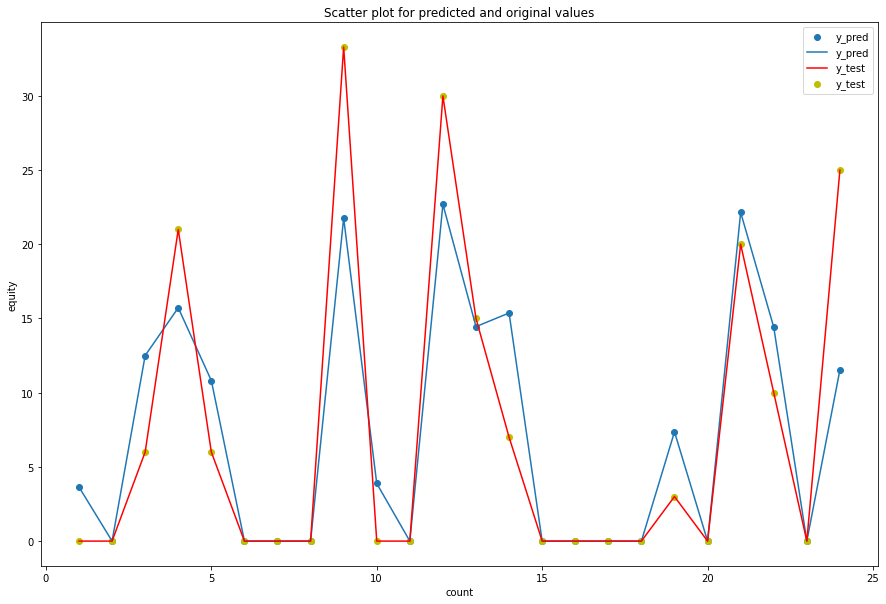

In [26]:
b = []
for j in range(1,25):
    b.append(j)
plt.figure(figsize=(15, 10))
plt.scatter(b,y_pred)
plt.plot(b,y_pred)
plt.plot(b,y_test,color='r')
plt.scatter(b,y_test,color='y')
plt.legend()
plt.xlabel("count")
plt.ylabel("equity")
plt.title("Scatter plot for predicted and original values")
plt.legend(["y_pred","y_pred","y_test","y_test"],loc="best")
plt.show()

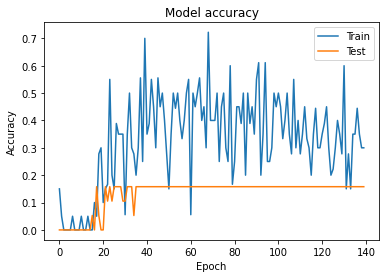

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

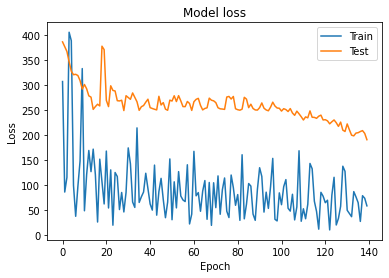

In [28]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='best') 
plt.show()